# Simple Linear Regression from Scratch

---

### Learning Objectives
- Code simple linear regression from scratch using a simple housing price dataset
- Plot the regression line and predictions against the true values

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

% matplotlib inline

<a id='load-data'></a>

## Load the real estate data

---

In this lesson we will be constructing a simple linear regression. Included in the datasets folder is a very simple dataset on real estate prices.

**Load the data using pandas.**

In [12]:
house_csv = './datasets/housing-data.csv'

house = pd.read_csv(house_csv)
house.head()

,sqft,bdrms,age,price
0,2104,3,70,399900
1,1600,3,28,329900
2,2400,3,44,369000
3,1416,2,49,232000
4,3000,4,75,539900


<a id='build-slr'></a>

## Build a SLR: estimating `price` with `sqft`

---

We will start by constructing the simple linear regression. Below is the formulation for the SLR and our specific model of interest:

### $$ y = \beta_0 + \beta_1 x + \epsilon \\
\text{price} = \beta_0 + \beta_1 \text{sqft} + \epsilon$$

> $\beta_0$: the intercept

Without the intercept term the regression line would always have to pass through the origin, which is almost never an optimal way to represent the relationship between our target and predictor variable.

The formula to calculate intercept (c) is:

### $$ \beta_0 = mean(y) – mean(x) * m $$


> $\beta_1$: the coefficient on $x$ 

We intend to estimate the values of $y$ from $x$. Each value of $x$ is multiplied by the same coefficient, which is why linear regression models model a _linear_ relationship between our predictor and target variable.

Recall that a 1 unit increase in $x$ will correspond to a $\beta_1$ unit increase in $y$ according to our model.

The mathematical formula to calculate slope (m) is:

### $$ \beta_1 = (mean(x) * mean(y) – mean(x*y)) / ( mean (x)^2 – mean( x^2)) $$

> $\epsilon_1$: the error (residuals)

This is the difference between the predicted and true values that are unexplained by $x$ in the regression.

---

<a id='target-predictor'></a>

### Define the target and predictor variables

Extract the target variable and predictor variable from our pandas dataframe. Classically, target and predictor are referred to dependent and independent variables. There are many different terms for what $x$ and $y$ represent.

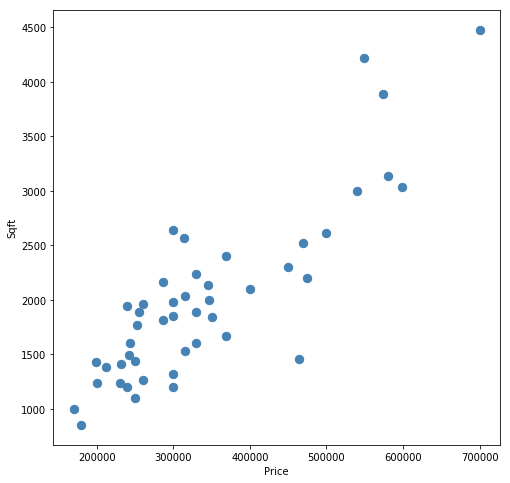

In [71]:
# target
price = house['price']

# predictor
sqft = house['sqft']

fig = plt.figure(figsize=(8, 8))
ax = fig.gca()  

# y-true
ax.scatter(price, sqft, color='steelblue', s=70)

plt.xlabel('Price')
plt.ylabel('Sqft')

plt.show()

You can see that the dependent variable has a linear distribution with respect to the independent variable.

Now, let’s write a function for intercept and slope (coefficient):

<a id='plot-regline'></a>

### Write two functions to to find intercept and slope

Your function should:
- Accept $X$, $y$ as arguments
- Calculate the intercept $\beta_0$ and slope $\beta_1$ 

In [5]:
def calculate_coefficient(xs, ys):
    '''
    Returns coefficient from x and y
    
    Formula: (mean(x) mean(y) – mean(xy)) / ( mean (x)^2 – mean( x^2))
    '''
    x = np.array(xs)
    y = np.array(ys)
      
    return (((np.mean(x) * np.mean(y)) - np.mean(x * y)) / (np.mean(x) ** 2 - np.mean(x ** 2)))

In [6]:
def calculate_intercept(xs, ys):
    '''
    Returns intercept from x and y
    
    Formula: mean(y) – mean(x) * m
    '''
    x = np.array(xs)
    y = np.array(ys)
    
    return (np.mean(y) - (np.mean(x) * calculate_coefficient(x, y)))

<a id='plot-regline'></a>

### Write a function to plot a regression line

Your function should:
- Accept $\beta_0$, $\beta_1$, $x$, and $y$ as arguments
- Calculate the predicted values $\hat{y}$ given $x$ (using the function you wrote above)
- Plot the original points
- Plot the predicted points (in a different color)
- Plot the regression line defined by the slope and intercept

In [39]:
def calculate_yhat(x, b0, b1):
    return b0 + b1*x

In [135]:
def plot_regression(x, y, b0, b1, withResudals=False):
    
    fig = plt.figure(figsize=(7,7))
    ax = fig.gca()
    # Predictive Function
    yhat = calculate_yhat(x, b0, b1)
    # y-true
    ax.scatter(x, y, color='steelblue', s=70)
    # y-pred
    ax.scatter(x, yhat, color='darkred')
    
    min_x, max_x = np.min(x), np.max(x)
    min_yhat = calculate_yhat(min_x, b0, b1)
    max_yhat = calculate_yhat(max_x, b0, b1)
    
    # plots trend line
    ax.plot([min_x, max_x], [min_yhat, max_yhat], color='darkred',
            linewidth=2.0, alpha=0.7)
    
    if withResudals == True:
        col_names =  ['X', 'Y', 'YHat']
        h = pd.DataFrame(columns = col_names) #creates a new dataframe that's empty
        h['X'] = x
        h['Y'] = y
        h['YHat'] = yhat
        # iterate over predictions
        for _, row in h.iterrows():
            plt.plot((row['X'], row['X']), (row['Y'], row['YHat']), 'b-')
    
    plt.show()

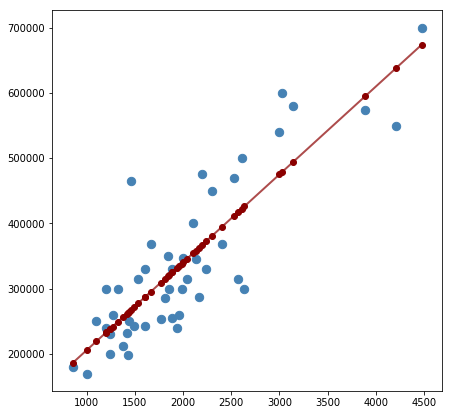

In [136]:
b0 = calculate_intercept(sqft, price)
b1 = calculate_coefficient(sqft, price)

plot_regression(sqft, price, b0, b1)

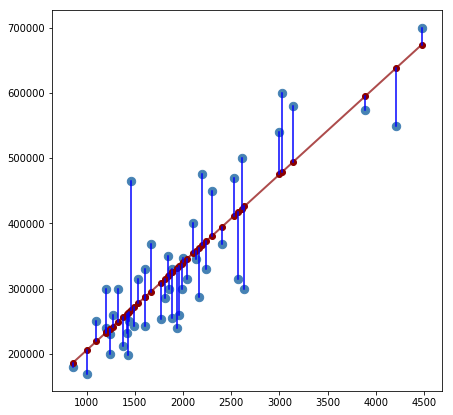

In [137]:
plot_regression(sqft, price, b0, b1, withResudals=True)